# Wrist Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import time
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from Data_preparation_Library import *
from scipy import signal

In [7]:
def difference(dataset, interval=1):
	diff = []
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)

In [8]:
def norm(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    df = scaler.transform(df)
    return df

In [9]:
def norm(df):
    scaler = StandardScaler(with_mean=True,
                            with_std=True,
                            copy=False).fit(df)
    df = scaler.transform(df)
    return df

In [10]:
def rms_df(df,window):
    labels = df.columns
    for x in labels:
        rms_vals = [0]*window
        for i in range(len(df[x])-window):
            j = i + window
            rms = np.sqrt(np.mean(df[x][j-window:j]**2))
            rms_vals.append(rms)
        df[x] = np.array(rms_vals)
    return df


In [11]:
def angles_plot(df,angle_name,window=1000):
    
    angle_thresh = 0.001
    
    plt.figure(figsize=(20,8))
    plt.grid()
    plt.axis('on')
    
    labels = [0]*window
    angles = np.array(df[angle_name+'_Angle'])
    
    for i in range(df.shape[0]-window):
        j = i + window
        loc_angles = angles[j-window:j]
        diff = difference(loc_angles).mean()
        if(abs(diff)<angle_thresh):
            labels.append(0)
        elif(diff>0):
            labels.append(1)
        else:
            labels.append(2)
            
    i = 0
    counter = [0,0,0]
#     for lb in tqdm(labels):
    for lb in labels:
        if lb==0:
            counter[0]=counter[0]+1
            face = '1'
        if lb==1:
            counter[1]=counter[1]+1
            face='r'
        if lb==2:
            counter[2]=counter[2]+1
            face='b'
        plt.axvspan(i, i+1, facecolor=face, alpha=0.5)
        i = i+1
   
    y = np.linspace(0,df.shape[0],df.shape[0])
    plt.plot(y,angles, linewidth=2, markersize=12)
    plt.title(angle_name+' Classifications')
    
    clear_patch = mpatches.Patch(color='white', label='No Motion')
    blue_patch = mpatches.Patch(color='blue', label='Negative Motion(-)')
    red_patch = mpatches.Patch(color='red', label='Positive Motion(+)')
    plt.legend(handles=[clear_patch,red_patch,blue_patch],loc=2)
    
    plt.xlabel('t [2000hz]')
    plt.ylabel('Angle (deg)')    
    plt.show()
    for i in range(3):
        print(i,'->',counter[i]*100/df.shape[0],'%')

In [12]:
def angles_plot_DTM(df,window=1000):
    
    angle_thresh = 0.005
    
    plt.figure(figsize=(20,8))
    plt.grid()
    plt.axis('on')
    
    labels = [0]*window
    angles_flexion = np.array(df['Flexion_Angle'])
    angles_radial = np.array(df['Radial_Angle'])
    
    for i in range(df.shape[0]-window):
        j = i + window
        loc_flexion = angles_flexion[j-window:j]
        loc_radial = angles_radial[j-window:j]
        
        diff_flexion = difference(loc_flexion).mean()
        diff_radial = difference(loc_radial).mean()
        
        if(abs(diff_flexion)<angle_thresh and abs(diff_radial)<angle_thresh):
            labels.append(0)
        elif(diff_flexion>0 and diff_radial>0):
            labels.append(1)
        else:
            labels.append(2)
            
    i = 0
    counter = [0,0,0]
#     for lb in tqdm(labels):
    for lb in labels:
        if lb==0:
            counter[0]=counter[0]+1
            face = '1'
        if lb==1:
            counter[1]=counter[1]+1
            face='r'
        if lb==2:
            counter[2]=counter[2]+1
            face='b'
        plt.axvspan(i, i+1, facecolor=face, alpha=0.5)
        i = i+1
   
    y = np.linspace(0,df.shape[0],df.shape[0])
    plt.plot(y,angles_flexion, linewidth=2, markersize=12,label='Extension/Flexion Angle')
    plt.plot(y,angles_radial, linewidth=2, markersize=12,label='Ulnar/Radial Angle')
    plt.title('DTM Classifications')
    
    clear_patch = mpatches.Patch(color='white', label='No Motion')
    blue_patch = mpatches.Patch(color='blue', label='Negative Motion(-)')
    red_patch = mpatches.Patch(color='red', label='Positive Motion(+)')
    plt.legend(handles=[clear_patch,red_patch,blue_patch],loc=2)
    
    plt.xlabel('t [2000hz]')
    plt.ylabel('Angle (deg)')    
    plt.show()
    for i in range(3):
        print(i,'->',counter[i]*100/df.shape[0],'%')

In [13]:
def emg_label_plot(df,window,typ=1,normalize=False,rms=False):
    labels = [0]*window
    plt.figure(figsize=(20,8))
    plt.grid()
    plt.axis('on')
    
    if typ==1:
        angle_thresh = 0.001
        angles_flexion = np.array(df['Flexion_Angle'])
        angles_radial = np.array(df['Radial_Angle'])
        for i in range(df.shape[0]-window):
            j = i + window
            loc_flexion = angles_flexion[j-window:j]
            loc_radial = angles_radial[j-window:j]

            diff_flexion = difference(loc_flexion).mean()
            diff_radial = difference(loc_radial).mean()

            if(abs(diff_flexion)<angle_thresh and abs(diff_radial)<angle_thresh):
                labels.append(0)
            elif(diff_flexion>0 and diff_radial>0):
                labels.append(1)
            else:
                labels.append(2)
    else:
        angle_thresh = 0.005
        angles = np.array(df['Pronation_Angle'])
        for i in range(df.shape[0]-window):
            j = i + window
            loc_angles = angles[j-window:j]
            diff = difference(loc_angles).mean()
            if(abs(diff)<angle_thresh):
                labels.append(0)
            elif(diff>0):
                labels.append(1)
            else:
                labels.append(2)
                
    emg_labels = ['EMG1', 'EMG2', 'EMG3', 
                  'EMG4', 'EMG5', 'EMG6',
                  'EMG7', 'EMG8', 'EMG9', 
                  'EMG10','EMG11','EMG12']
    if normalize==True:
        df[emg_labels] = norm(df[emg_labels])
    if rms==True:
        df[emg_labels] = rms_df(df[emg_labels],window)
    
    y = np.linspace(0,df.shape[0],df.shape[0])    
    for lbs in emg_labels:
        plt.plot(y,df[lbs],linewidth=2, markersize=12,label=lbs)
        
    i = 0
    counter = [0,0,0]
#     for lb in tqdm(labels):
    for lb in labels:
        if lb==0:
            counter[0]=counter[0]+1
            face = '1'
        if lb==1:
            counter[1]=counter[1]+1
            face='r'
        if lb==2:
            counter[2]=counter[2]+1
            face='b'
        plt.axvspan(i, i+1, facecolor=face, alpha=0.2)
        i = i+1
        
    clear_patch = mpatches.Patch(color='white', label='No Motion')
    blue_patch = mpatches.Patch(color='blue', label='Negative Motion(-)')
    red_patch = mpatches.Patch(color='red', label='Positive Motion(+)')
    plt.legend(handles=[clear_patch,red_patch,blue_patch],loc=2)
    plt.legend(emg_labels,loc=2)
    
    plt.xlabel('t [2000hz]')
    plt.ylabel('sEMG(V)')
    plt.show()       

    

In [14]:
def count_labesl(array):
    ln = len(array)
    sum_0 = 0
    sum_1 = 0
    sum_2 = 0
    for x in array:
        if(x==0):
            sum_0 = sum_0 + 1
        if(x==1):
            sum_1 = sum_0 + 1
        if(x==2):
            sum_2 = sum_0 + 1
    print('Label 0 =',sum_0)
    print('Label 1 =',sum_1)
    print('Label 2 =',sum_2)

In [15]:
def compartive_label_plot(df,window,frames=None,typ=1,emg_norm=False,rms=False):
    st = time()
    if frames!=None:
        start,end = frames
        df = Bulb[start:end]
    angle_df = df[['Pronation_Angle','Flexion_Angle','Radial_Angle','Elbow_Joint_Angle']]
    angle_df.plot(figsize=(20,8),legend=True,xlabel='t [2000hz]',ylabel='Angle (deg)',grid=True,title='Angles Plot')
    emg_label_plot(df,window,typ,emg_norm,rms)
    if(typ==1):
        angles_plot_DTM(df,window)
    else:
        angles_plot(df,'Pronation',window)
    print('Time elp-',(time()-st),'s')

In [16]:
path = 'Subjects/Ingy/'
trial = '01'
file = path + 'computed_Hammer'+trial+'.csv'
Hammer = pd.read_csv(file,index_col=0)
file = path + 'computed_Cup'+trial+'.csv'
Cup = pd.read_csv(file,index_col=0)
file = path + 'computed_Bulb'+trial+'.csv'
Bulb = pd.read_csv(file,index_col=0)
file = path + 'computed_Screw'+trial+'.csv'
Screw = pd.read_csv(file,index_col=0)

- Clear - No Motion
- Red - Positive Direction
- Blue - Negative Direction

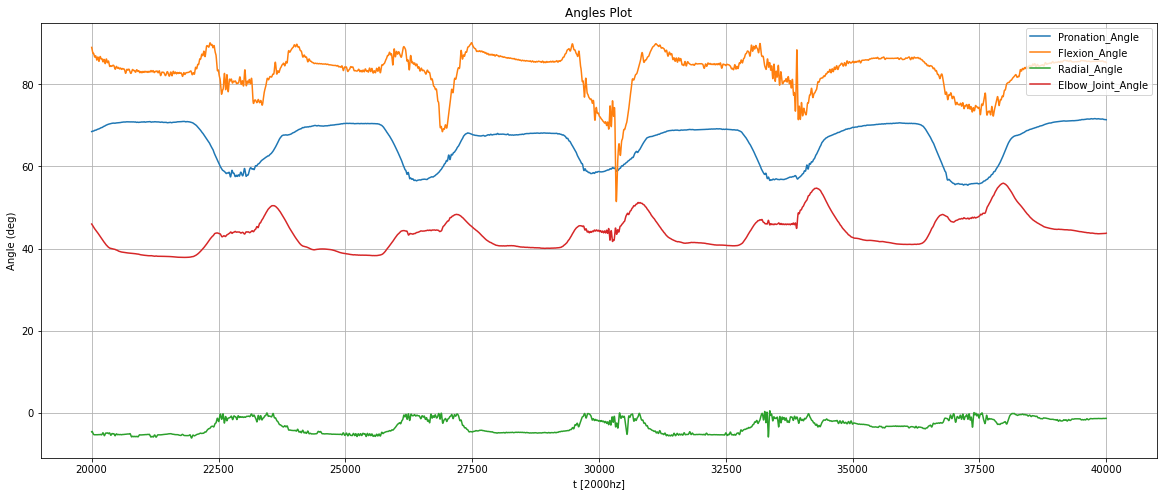

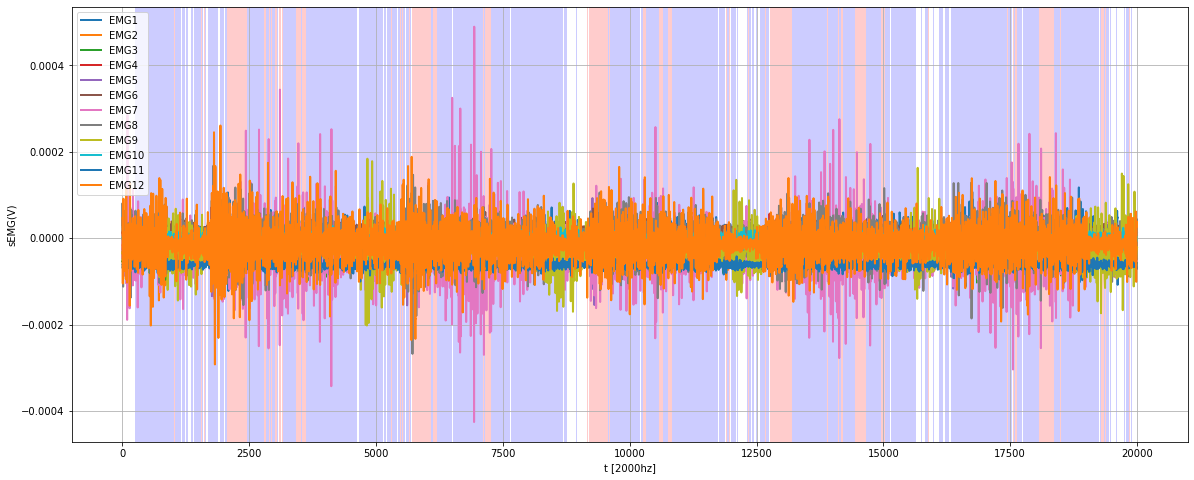

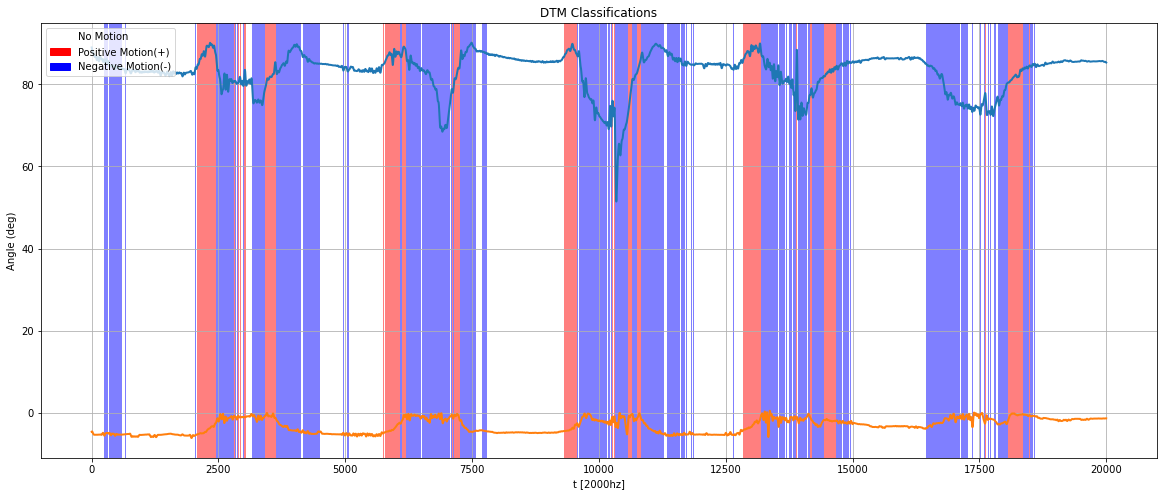

0 -> 47.605 %
1 -> 13.27 %
2 -> 39.125 %
Time elp- 100.46345829963684 s


In [17]:
compartive_label_plot(Hammer,250,frames=(20000,40000),typ=1,emg_norm=False,rms=False)

In [ ]:
compartive_label_plot(Hammer,400,frames=(20000,40000),typ=2,emg_norm=False,rms=False)

# Preprocessing Testing

In [2]:
file = 'Subjects/Nikhil/computed_Bulb.csv'
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle','DTM_Angle']
df = pd.read_csv(file,index_col=0)

def subj_plot(subj,time=None,Normalize=False,rms=False,rms_window=20):
    frame = time
    file = 'Subjects/{}/computed_Bulb.csv'.format(subj)
    df = pd.read_csv(file,index_col=0)
    df = filter_df([df])[0]
    emg_df = df[emg_labels]
    if Normalize==True:
        emg_df = pd.DataFrame(norm(emg_df),columns=emg_labels)
        emg_df = pd.DataFrame(np.array(emg_df),columns=emg_labels)
    
    if rms==True:
        emg_df = rms_df(emg_df,rms_window)
        emg_df = pd.DataFrame(np.array(emg_df),columns=emg_labels)
        
    if frame == None:
        X, y = prep_data_velocity(df,250,interval=10,Normalize=False,rms=False,angle_label ='Pronation_Angle')
        plt.figure(figsize=(16,5))
        plt.figtext(.5,.9,subj, fontsize=20, ha='center')
        plt.plot(y)
        plt.show()
        emg_df.plot(figsize=(16,5))
    else:
        nframe = [int(frame[0]*2000),int(frame[1]*2000)]
        print(nframe)
        X, y = prep_data_velocity(df[nframe[0]:nframe[1]],250,interval=10,Normalize=False,rms=False,angle_label ='Pronation_Angle')
        plt.figure(figsize=(16,5))
        plt.figtext(.5,.9,subj, fontsize=20, ha='center')
        plt.plot(y)
        plt.show()
        emg_df[nframe[0]:nframe[1]].plot(figsize=(16,5))

In [3]:
def rms_df(df,window=20):
    ldif = window-1
    emg_df = pd.DataFrame(columns=df.columns)
    for column in df.columns:
        rms_arr = window_rms(df[column],window)
        fill_arr = np.ones(ldif)
        emg_df[column] = np.array(list(window_rms(df[column],window)) + list(fill_arr))
#     print(emg_df.shape)
    return emg_df
        
def window_rms(a, window_size):
    a2 = np.power(a,2)
    window = np.ones(window_size)/float(window_size)
    return np.sqrt(np.convolve(a2, window, 'valid'))

[10000, 16000]


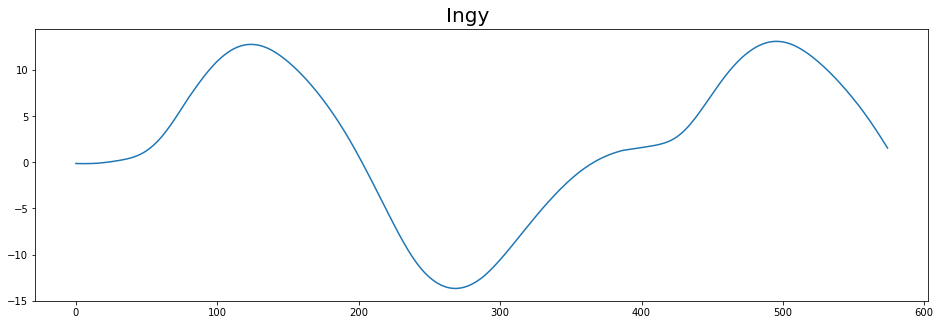

[10000, 16000]


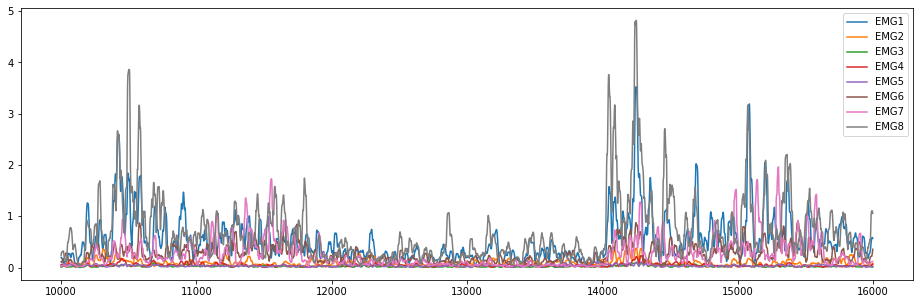

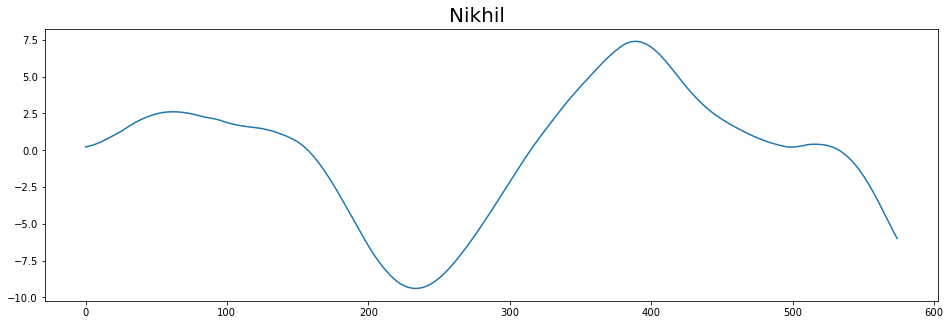

[12000, 18000]


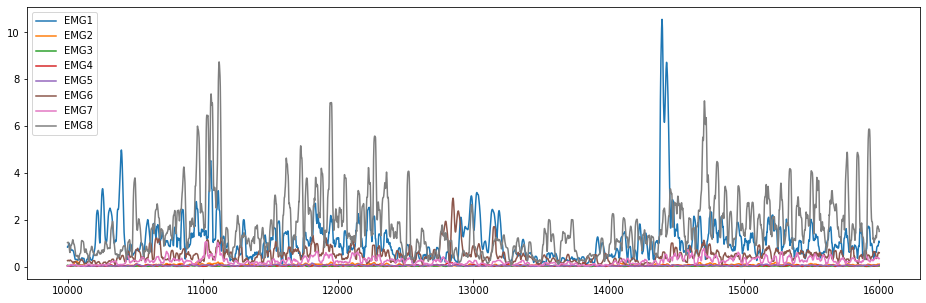

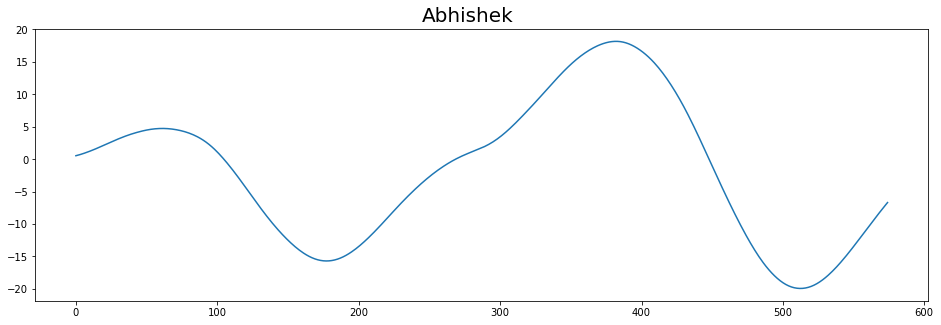

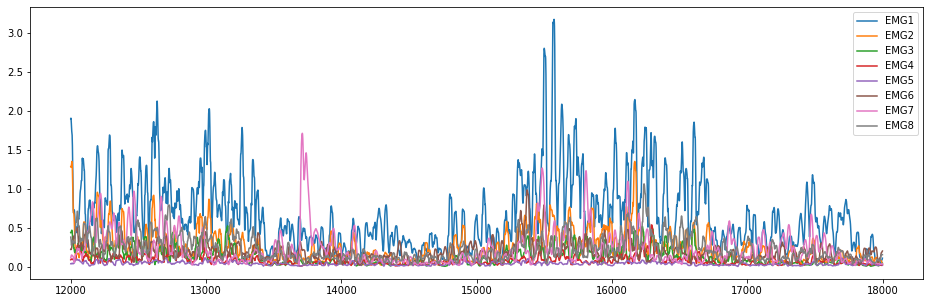

In [4]:
subj_plot('Ingy',time = [5,8],Normalize=True,rms=True,rms_window=20)
subj_plot('Nikhil',time = [5,8],Normalize=True,rms=True,rms_window=20)
subj_plot('Abhishek',time = [6,9],Normalize=True,rms=True,rms_window=20)

# Preprocessing Pipeline

In [10]:
def filter_array(arr,cf,order=1,fs=2000,btype='lowpass'):
    if len(arr.reshape((-1)).shape) < 2:
        arr = arr.reshape((-1))
    b,a = signal.butter(order, cf,fs=fs,btype=btype)
    arr = signal.lfilter(b, a,arr)
    return arr

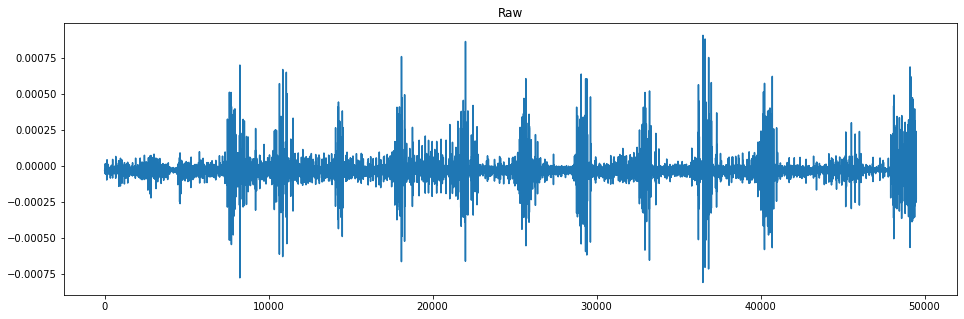

In [11]:
file = 'Subjects/Ingy/computed_Hammer.csv'
df = pd.read_csv(file,index_col=0)
# df = filter_df([df])[0]
emg_arr = df['EMG7'][4500:85000].values
plt.figure(figsize=(16,5))
plt.title('Raw')
plt.plot(emg_arr)

In [54]:
fs = 2000
n = 4
Fa = 80
Fb = 800
cf = np.array([Fa,Fb])

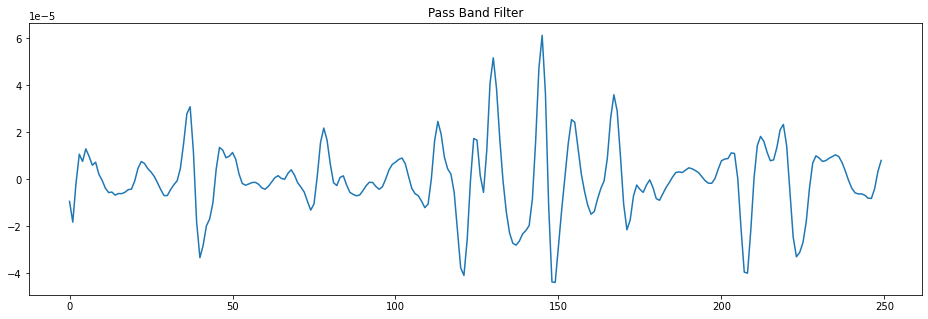

In [56]:
emg_arr_1 = filter_array(emg_arr,cf=cf,order=n,fs=fs,btype='bandpass')
plt.figure(figsize=(16,5))
plt.title('Pass Band Filter')
plt.plot(emg_arr_1[:250])

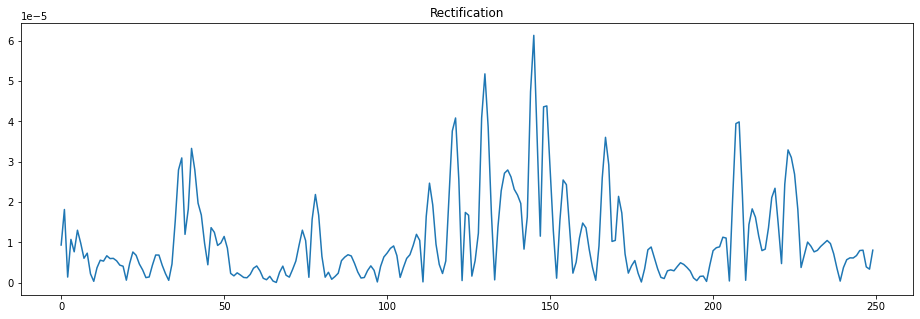

In [57]:
emg_arr_2 = abs(emg_arr_1)
# emg_arr_2 = emg_arr_1
plt.figure(figsize=(16,5))
plt.title('Rectification')
plt.plot(emg_arr_2[:250])

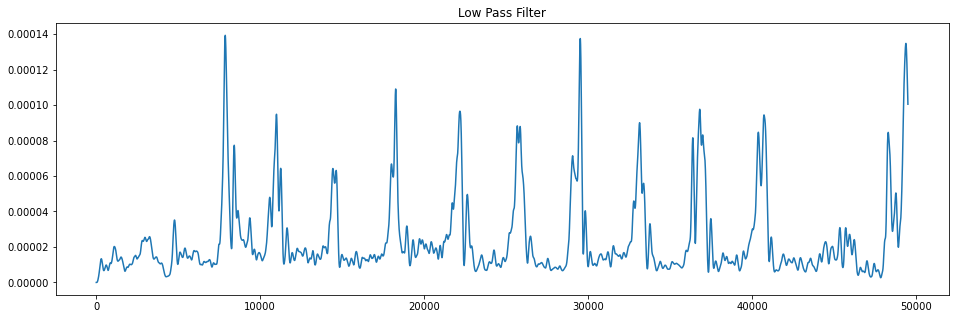

In [60]:
emg_arr_3 = filter_array(emg_arr_2,cf=6,order=4,fs=fs,btype='lowpass')
plt.figure(figsize=(16,5))
plt.title('Low Pass Filter')
plt.plot(emg_arr_3)

In [61]:
def preprocessor_arr(emg_arr):
    fs = 2000
    n = 4
    Fa = 80
    Fb = 800
    cf = np.array([Fa,Fb])
    emg_arr_1 = filter_array(emg_arr,cf=cf,order=n,fs=fs,btype='bandpass')
    emg_arr_2 = abs(emg_arr_1)
#     emg_arr_2 = filter_array(emg_arr_2,cf=6,order=1,fs=fs,btype='lowpass')
    return emg_arr_2
def preprocessor_df(df):
    emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8', 'EMG9', 'EMG10', 'EMG11', 'EMG12']
    fdf = df.copy()
    for lbs in emg_labels:
        fdf[lbs] = preprocessor_arr(df[lbs].values)
    return fdf

<AxesSubplot:>

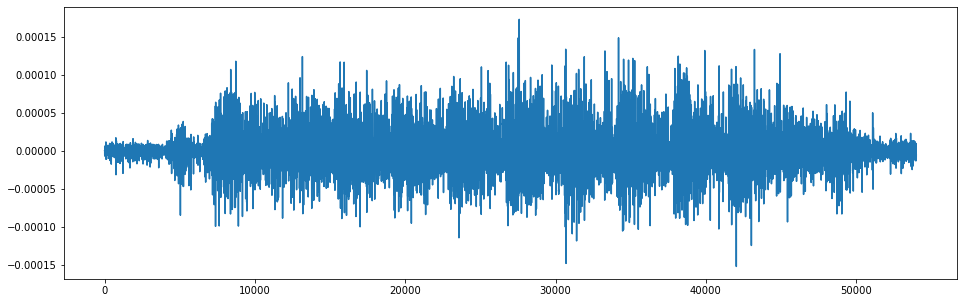

In [62]:
df['EMG1'].plot(figsize=(16,5))

<AxesSubplot:>

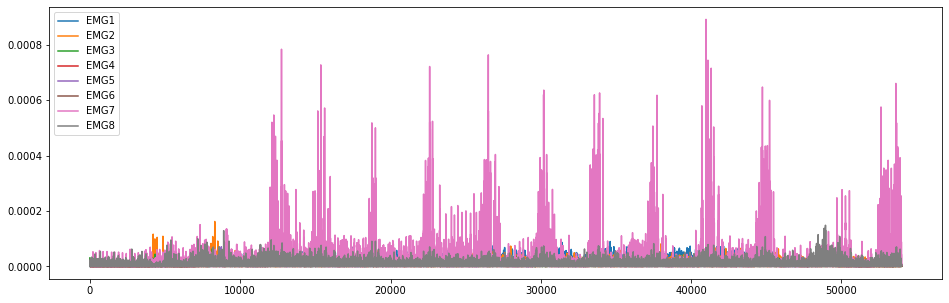

In [64]:
preprocessor_df(df)[emg_labels].plot(figsize=(16,5))

# TS Fresh Test (Automated Feature Selection)

In [2]:
from tsfresh import extract_relevant_features
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from sklearn.preprocessing import StandardScaler
import io

def tsf_sampler(subj):
    file = 'Subjects/{}/computed_Bulb.csv'.format(subj)
    df = pd.read_csv(file,index_col=0)
    df = df[20000:24000]
    # X, y1 = prep_data_velocity(df,250,interval=10,Normalize=False,rms=False,angle_label ='Pronation_Angle')

    emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
    emg_df = df[emg_labels]
    df = filter_df([df])[0]
    arr = np.diff(list(df['Pronation_Angle'])+[list(df['Pronation_Angle'].values)[-1]])
    arr = arr/(1/2000)
    b,a = signal.butter(3, 1,fs=2000)
    arr = signal.lfilter(b, a,arr)
    y = arr
#     pd.DataFrame(arr).plot(figsize=(16,5),title='Velocity',grid=True)
#     emg_df.plot(figsize=(16,5))
    return emg_df,y

def tsf_feature_selector():
    subjects = ['Ingy','Nikhil','Fazil','Abhishek','Deepti','Nirmayee','Varun','Jai']
    features_infos = []
    for subj in tqdm(subjects):
        emg_df,y = tsf_sampler(subj)
        t = np.linspace(0,int(emg_df.shape[0]/2000),emg_df.shape[0])
        emg_df['time'] = t
#         y = pd.Series(y)
        extracted_features = extract_features(emg_df,column_id='time')
        impute(extracted_features)
        features_filtered = select_features(extracted_features, y)
        text_file = open("feature_infos.txt", "a")
        text_file.write(str(features_filtered.columns.to_list())+'\n')
        text_file.close()

def tsf_feature_selector_whole():
    emg_labels = ['EMG1', 'EMG2', 'EMG3', 'EMG4', 'EMG5', 'EMG6','EMG7', 'EMG8']
    angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']
    y_all = []
    emg_df_all = pd.DataFrame(columns=emg_labels)
    subjects = ['Ingy','Nikhil','Fazil','Abhishek','Deepti','Nirmayee','Varun','Jai']
    for subj in tqdm(subjects):
        edf,y = tsf_sampler(subj)
        y_all = y_all + list(y)
        emg_df_all = emg_df_all.append(edf)  
    emg_df_all.to_csv('prepared_data/emg_df_all_norm.csv')
    
    scaler = StandardScaler()
    vals = scaler.fit_transform(emg_df_all)
    emg_df_all = pd.DataFrame(data=vals,columns=emg_labels)
    t = np.linspace(0,int(emg_df_all.shape[0]/2000),emg_df_all.shape[0])
    emg_df_all['time'] = t
    extracted_features = extract_features(emg_df_all,column_id='time')
    impute(extracted_features)
    y_all = np.array(y_all)
    features_filtered = select_features(extracted_features, y_all)
    features_filtered.to_csv('prepared_data/features_filtered_norm.csv')
    return features_filtered

In [3]:
tsf = tsf_feature_selector_whole()
tsf

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [28:52<00:00, 57.75s/it]
C:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\tsfresh\utilities\dataframe_functions.py:171: RuntimeWarning: The columns ['EMG1__mean_abs_change' 'EMG1__mean_change'
 'EMG1__mean_second_derivative_central' ...
 'EMG8__matrix_profile__feature_"median"__threshold_0.98'
 'EMG8__matrix_profile__feature_"25"__threshold_0.98'
 'EMG8__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


,EMG4__range_count__max_1__min_-1,EMG5__range_count__max_1__min_-1,EMG3__range_count__max_1__min_-1,EMG1__abs_energy,EMG1__root_mean_square,"EMG1__fft_coefficient__attr_""abs""__coeff_0",EMG2__range_count__max_1__min_-1,EMG7__range_count__max_1__min_-1,EMG1__range_count__max_1__min_-1,"EMG2__fft_coefficient__attr_""abs""__coeff_0",...,EMG8__count_below__t_0,EMG8__range_count__max_1000000000000.0__min_0,"EMG8__fft_coefficient__attr_""angle""__coeff_0",EMG8__count_above__t_0,EMG6__count_below__t_0,EMG6__count_above__t_0,EMG6__range_count__max_1000000000000.0__min_0,"EMG6__fft_coefficient__attr_""angle""__coeff_0",EMG8__benford_correlation,EMG5__benford_correlation
0.0000,1.0,1.0,1.0,0.004970,0.070496,0.070496,1.0,1.0,1.0,0.145731,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,180.0,0.062915,-0.200946
0.0005,1.0,1.0,1.0,0.002558,0.050581,0.050581,1.0,1.0,1.0,0.107393,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,180.0,0.864123,-0.145280
0.0010,1.0,1.0,1.0,0.000248,0.015732,0.015732,1.0,1.0,1.0,0.071297,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.295657,0.864123
0.0015,1.0,1.0,1.0,0.003662,0.060514,0.060514,1.0,1.0,1.0,0.112685,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.864123,0.062915
0.0020,1.0,1.0,1.0,0.025896,0.160923,0.160923,1.0,1.0,1.0,0.194959,...,1.0,0.0,180.0,0.0,0.0,1.0,1.0,0.0,0.864123,-0.064614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15.9980,1.0,1.0,1.0,0.103131,0.321141,0.321141,1.0,1.0,1.0,0.474899,...,1.0,0.0,180.0,0.0,1.0,0.0,0.0,180.0,0.062915,0.864123
15.9985,1.0,1.0,1.0,0.392592,0.626572,0.626572,1.0,1.0,1.0,0.275689,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.062915,0.864123
15.9990,1.0,1.0,1.0,0.741304,0.860990,0.860990,1.0,1.0,1.0,0.132377,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.145280,-0.272809
15.9995,1.0,1.0,1.0,0.438550,0.662231,0.662231,1.0,1.0,1.0,0.290421,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.062915,-0.241690


In [4]:
tsf_columns = tsf.columns.to_list()
tsf_columns

['EMG4__range_count__max_1__min_-1',
 'EMG5__range_count__max_1__min_-1',
 'EMG3__range_count__max_1__min_-1',
 'EMG1__abs_energy',
 'EMG1__root_mean_square',
 'EMG1__fft_coefficient__attr_"abs"__coeff_0',
 'EMG2__range_count__max_1__min_-1',
 'EMG7__range_count__max_1__min_-1',
 'EMG1__range_count__max_1__min_-1',
 'EMG2__fft_coefficient__attr_"abs"__coeff_0',
 'EMG2__root_mean_square',
 'EMG2__abs_energy',
 'EMG7__abs_energy',
 'EMG7__root_mean_square',
 'EMG7__fft_coefficient__attr_"abs"__coeff_0',
 'EMG6__range_count__max_1__min_-1',
 'EMG8__range_count__max_1__min_-1',
 'EMG5__abs_energy',
 'EMG5__fft_coefficient__attr_"abs"__coeff_0',
 'EMG5__root_mean_square',
 'EMG8__fft_coefficient__attr_"abs"__coeff_0',
 'EMG8__abs_energy',
 'EMG8__root_mean_square',
 'EMG6__root_mean_square',
 'EMG6__abs_energy',
 'EMG6__fft_coefficient__attr_"abs"__coeff_0',
 'EMG4__abs_energy',
 'EMG4__root_mean_square',
 'EMG4__fft_coefficient__attr_"abs"__coeff_0',
 'EMG4__count_above__t_0',
 'EMG4__coun

In [5]:
# key = 'abs_energy'
keys = ['abs_energy','root_mean_square','fft_coefficient','benford_correlation','quantile','cwt_coefficients']
key_counts = []
for key in keys:
    key_count = 0
    for feature in tsf_columns:
        if key in feature:
            key_count=key_count+1
    key_counts.append(key_count)
for i in range(len(keys)):
    print(keys[i],'-->',key_counts[i])
#             print(feature)
#     print('Total Feature Occurance',key_count)

abs_energy --> 7
root_mean_square --> 7
fft_coefficient --> 13
benford_correlation --> 3
quantile --> 8
cwt_coefficients --> 4


In [6]:
emg_labels = ['EMG1', 'EMG2', 'EMG3', 'EMG4', 'EMG5', 'EMG6','EMG7', 'EMG8']
key_counts = []
for key in emg_labels:
    key_count = 0
    for feature in tsf_columns:
        if key in feature:
            key_count=key_count+1
    key_counts.append(key_count)
for i in range(len(emg_labels)):
    print(emg_labels[i],'-->',key_counts[i])

EMG1 --> 4
EMG2 --> 4
EMG3 --> 5
EMG4 --> 8
EMG5 --> 5
EMG6 --> 9
EMG7 --> 8
EMG8 --> 27


In [7]:
for feature in tsf_columns:
    if 'fft_coefficient' in feature:
        print(feature)

EMG1__fft_coefficient__attr_"abs"__coeff_0
EMG2__fft_coefficient__attr_"abs"__coeff_0
EMG7__fft_coefficient__attr_"abs"__coeff_0
EMG5__fft_coefficient__attr_"abs"__coeff_0
EMG8__fft_coefficient__attr_"abs"__coeff_0
EMG6__fft_coefficient__attr_"abs"__coeff_0
EMG4__fft_coefficient__attr_"abs"__coeff_0
EMG4__fft_coefficient__attr_"angle"__coeff_0
EMG3__fft_coefficient__attr_"angle"__coeff_0
EMG7__fft_coefficient__attr_"angle"__coeff_0
EMG8__fft_coefficient__attr_"real"__coeff_0
EMG8__fft_coefficient__attr_"angle"__coeff_0
EMG6__fft_coefficient__attr_"angle"__coeff_0


EMG1__fft_coefficient__attr_"abs"__coeff_0


<AxesSubplot:>

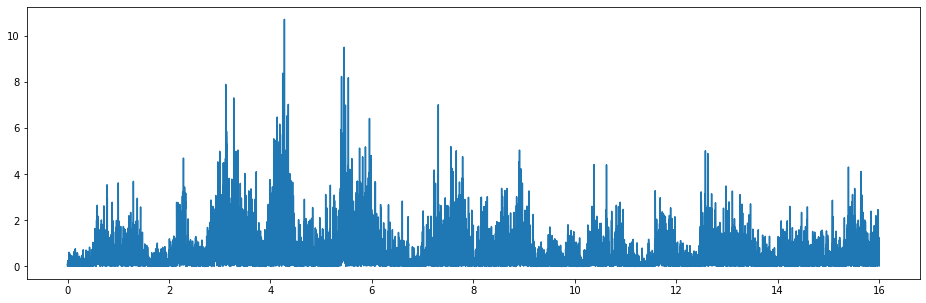

In [9]:
col = 'EMG1__fft_coefficient__attr_"abs"__coeff_0'
print(col)
tsf[col].plot(figsize=(16,5))

In [ ]:
y_all = []
emg_df_all = pd.DataFrame(columns=emg_labels)
subjects = ['Ingy','Nikhil','Fazil','Abhishek','Deepti','Nirmayee','Varun','Jai']
for subj in subjects:
    edf,ys = tsf_sampler(subj)
    y_all = y_all + list(y)
    emg_df_all = emg_df_all.append(edf)
emg_df_all    

In [ ]:
emg_df_all.to_csv('prepared_data/extracted_emg')

In [21]:
tsf_feature_selector()

Feature Extraction: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:50<00:00,  5.68s/it]
C:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\tsfresh\utilities\dataframe_functions.py:171: RuntimeWarning: The columns ['EMG1__mean_abs_change' 'EMG1__mean_change'
 'EMG1__mean_second_derivative_central' ...
 'EMG8__matrix_profile__feature_"median"__threshold_0.98'
 'EMG8__matrix_profile__feature_"25"__threshold_0.98'
 'EMG8__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [03:02<00:00,  6.10s/it]
C:\Users\moham\AppData\Local\Programs\Pytho

In [109]:
emg_df, y = tsf_sampler('Ingy')

In [49]:
emg_df = emg_df_all
y = np.array(y_all)

In [110]:
t = np.linspace(0,int(emg_df.shape[0]/2000),emg_df.shape[0])
emg_df['time'] = t
emg_df

,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,time
20000,0.000003,-0.000019,-0.000051,6.299110e-06,-0.000024,0.000018,-0.000015,0.000004,0.000000
20001,0.000002,-0.000021,-0.000048,4.461620e-06,-0.000023,0.000020,-0.000001,0.000010,0.000500
20002,0.000001,-0.000022,-0.000044,4.353230e-06,-0.000022,0.000023,0.000001,0.000014,0.001000
20003,0.000003,-0.000021,-0.000042,5.978710e-06,-0.000021,0.000026,-0.000010,0.000010,0.001500
20004,0.000006,-0.000018,-0.000044,8.051560e-06,-0.000020,0.000024,-0.000028,0.000002,0.002001
...,...,...,...,...,...,...,...,...,...
23995,0.000008,-0.000020,-0.000051,5.231210e-06,-0.000029,0.000017,-0.000022,-0.000004,1.997999
23996,0.000007,-0.000020,-0.000051,1.600580e-06,-0.000030,0.000018,-0.000020,-0.000008,1.998500
23997,0.000006,-0.000021,-0.000050,-7.171320e-07,-0.000032,0.000017,-0.000021,-0.000011,1.999000
23998,0.000005,-0.000022,-0.000050,-1.421000e-06,-0.000037,0.000017,-0.000024,-0.000010,1.999500


In [ ]:
from tsfresh import extract_features
extracted_features = extract_features(emg_df,column_id='time')

Feature Extraction:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 18/30 [15:05<04:15, 21.32s/it]

In [ ]:
extracted_features

In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [ ]:
features_filtered

In [ ]:
features_filtered.info()

In [12]:
features_filtered.columns

Index(['EMG1__root_mean_square', 'EMG1__fft_coefficient__attr_"abs"__coeff_0',
       'EMG1__abs_energy', 'EMG8__fft_coefficient__attr_"abs"__coeff_0',
       'EMG8__root_mean_square', 'EMG8__abs_energy', 'EMG7__abs_energy',
       'EMG7__root_mean_square', 'EMG7__fft_coefficient__attr_"abs"__coeff_0',
       'EMG6__benford_correlation', 'EMG7__benford_correlation',
       'EMG6__count_above__t_0', 'EMG6__count_below__t_0',
       'EMG6__fft_coefficient__attr_"angle"__coeff_0',
       'EMG6__range_count__max_1000000000000.0__min_0',
       'EMG7__fft_coefficient__attr_"angle"__coeff_0',
       'EMG7__range_count__max_1000000000000.0__min_0',
       'EMG7__count_above__t_0', 'EMG7__count_below__t_0',
       'EMG5__range_count__max_1000000000000.0__min_0',
       'EMG5__count_below__t_0', 'EMG5__count_above__t_0',
       'EMG5__fft_coefficient__attr_"angle"__coeff_0',
       'EMG1__benford_correlation'],
      dtype='object')

<AxesSubplot:>

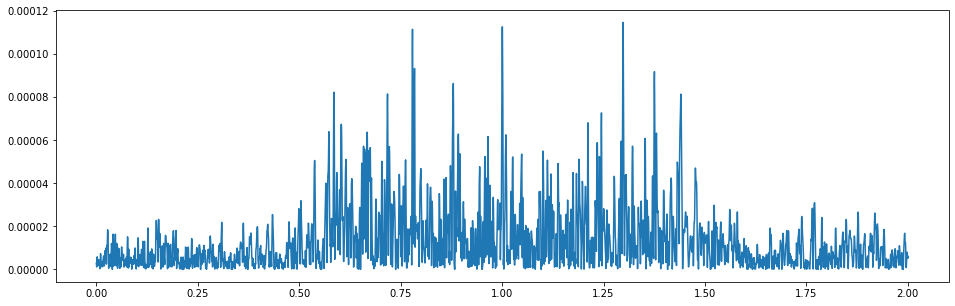

In [13]:
features_filtered['EMG1__root_mean_square'].plot(figsize=(16,5))

<AxesSubplot:>

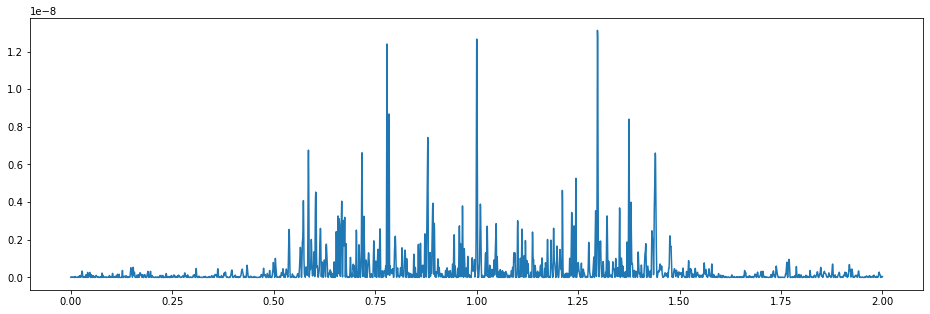

In [14]:
features_filtered['EMG1__abs_energy'].plot(figsize=(16,5))

<AxesSubplot:>

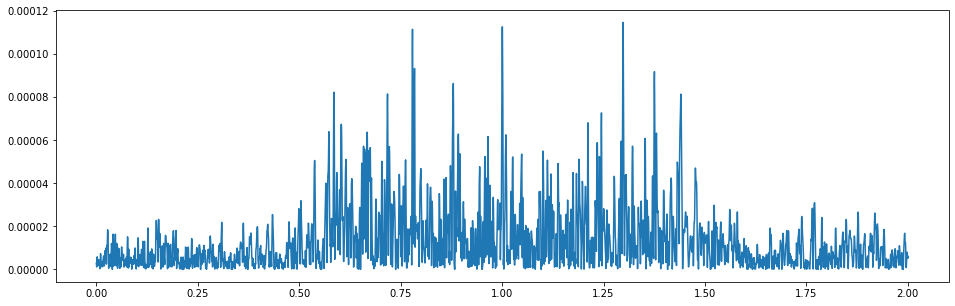

In [15]:
features_filtered['EMG1__fft_coefficient__attr_"abs"__coeff_0'].plot(figsize=(16,5))

<AxesSubplot:>

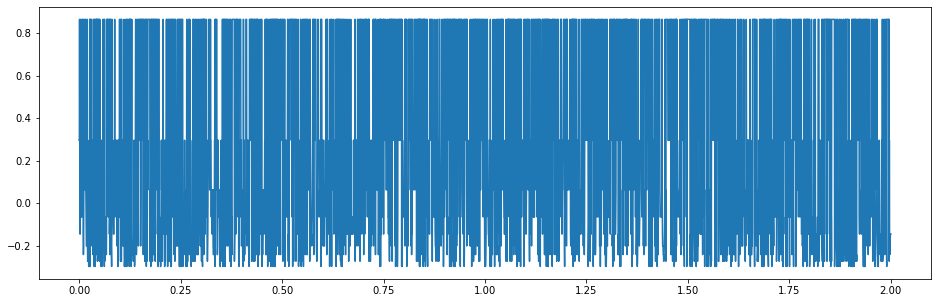

In [16]:
features_filtered['EMG1__benford_correlation'].plot(figsize=(16,5))

In [51]:
Ingy = ['EMG1__abs_energy', 'EMG1__root_mean_square', 'EMG1__fft_coefficient__attr_"abs"__coeff_0', 'EMG8__root_mean_square', 'EMG8__abs_energy', 'EMG8__fft_coefficient__attr_"abs"__coeff_0', 'EMG7__fft_coefficient__attr_"abs"__coeff_0', 'EMG7__root_mean_square', 'EMG7__abs_energy', 'EMG6__benford_correlation', 'EMG7__benford_correlation', 'EMG6__count_below__t_0', 'EMG6__count_above__t_0', 'EMG6__range_count__max_1000000000000.0__min_0', 'EMG6__fft_coefficient__attr_"angle"__coeff_0', 'EMG7__count_below__t_0', 'EMG7__count_above__t_0', 'EMG7__range_count__max_1000000000000.0__min_0', 'EMG7__fft_coefficient__attr_"angle"__coeff_0', 'EMG5__range_count__max_1000000000000.0__min_0', 'EMG5__count_below__t_0', 'EMG5__fft_coefficient__attr_"angle"__coeff_0', 'EMG5__count_above__t_0', 'EMG1__benford_correlation']
Nikhil = ['EMG1__fft_coefficient__attr_"abs"__coeff_0', 'EMG1__abs_energy', 'EMG1__root_mean_square', 'EMG6__benford_correlation', 'EMG6__fft_coefficient__attr_"angle"__coeff_0', 'EMG6__range_count__max_1000000000000.0__min_0', 'EMG6__count_above__t_0', 'EMG6__count_below__t_0', 'EMG7__abs_energy', 'EMG7__root_mean_square', 'EMG7__fft_coefficient__attr_"abs"__coeff_0', 'EMG2__count_below__t_0', 'EMG2__fft_coefficient__attr_"angle"__coeff_0', 'EMG2__range_count__max_1000000000000.0__min_0', 'EMG2__count_above__t_0', 'EMG7__benford_correlation']
Fazil = ['EMG5__abs_energy', 'EMG5__root_mean_square', 'EMG5__fft_coefficient__attr_"abs"__coeff_0', 'EMG2__benford_correlation', 'EMG6__count_above__t_0', 'EMG6__fft_coefficient__attr_"angle"__coeff_0', 'EMG6__count_below__t_0', 'EMG6__range_count__max_1000000000000.0__min_0', 'EMG2__count_below__t_0', 'EMG2__range_count__max_1000000000000.0__min_0', 'EMG2__fft_coefficient__attr_"angle"__coeff_0', 'EMG2__count_above__t_0', 'EMG3__abs_energy', 'EMG3__root_mean_square', 'EMG3__fft_coefficient__attr_"abs"__coeff_0', 'EMG6__benford_correlation', 'EMG2__fft_coefficient__attr_"abs"__coeff_0', 'EMG2__root_mean_square', 'EMG2__abs_energy', 'EMG4__root_mean_square', 'EMG4__abs_energy', 'EMG4__fft_coefficient__attr_"abs"__coeff_0', 'EMG3__count_below__t_0', 'EMG3__count_above__t_0', 'EMG3__range_count__max_1000000000000.0__min_0', 'EMG3__fft_coefficient__attr_"angle"__coeff_0', 'EMG7__count_above__t_0', 'EMG7__range_count__max_1000000000000.0__min_0', 'EMG7__fft_coefficient__attr_"angle"__coeff_0', 'EMG7__count_below__t_0', 'EMG5__count_below__t_0', 'EMG5__range_count__max_1000000000000.0__min_0', 'EMG5__count_above__t_0', 'EMG5__fft_coefficient__attr_"angle"__coeff_0', 'EMG1__fft_coefficient__attr_"abs"__coeff_0', 'EMG1__abs_energy', 'EMG1__root_mean_square']
Abhishek = ['EMG1__abs_energy', 'EMG1__root_mean_square', 'EMG1__fft_coefficient__attr_"abs"__coeff_0', 'EMG8__abs_energy', 'EMG8__root_mean_square', 'EMG8__fft_coefficient__attr_"abs"__coeff_0', 'EMG4__abs_energy', 'EMG4__root_mean_square', 'EMG4__fft_coefficient__attr_"abs"__coeff_0', 'EMG2__fft_coefficient__attr_"abs"__coeff_0', 'EMG2__root_mean_square', 'EMG2__abs_energy', 'EMG3__abs_energy', 'EMG3__root_mean_square', 'EMG3__fft_coefficient__attr_"abs"__coeff_0', 'EMG4__count_above__t_0', 'EMG4__range_count__max_1000000000000.0__min_0', 'EMG4__fft_coefficient__attr_"angle"__coeff_0', 'EMG4__count_below__t_0', 'EMG3__benford_correlation', 'EMG7__count_below__t_0', 'EMG7__count_above__t_0', 'EMG7__range_count__max_1000000000000.0__min_0', 'EMG7__fft_coefficient__attr_"angle"__coeff_0', 'EMG3__count_above__t_0', 'EMG3__fft_coefficient__attr_"angle"__coeff_0', 'EMG3__range_count__max_1000000000000.0__min_0', 'EMG3__count_below__t_0', 'EMG2__count_above__t_0', 'EMG2__range_count__max_1000000000000.0__min_0', 'EMG2__fft_coefficient__attr_"angle"__coeff_0', 'EMG2__count_below__t_0', 'EMG2__benford_correlation', 'EMG6__count_above__t_0', 'EMG6__range_count__max_1000000000000.0__min_0', 'EMG6__fft_coefficient__attr_"angle"__coeff_0', 'EMG6__count_below__t_0', 'EMG4__benford_correlation', 'EMG6__benford_correlation', 'EMG8__benford_correlation', 'EMG4__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)', 'EMG4__median', 'EMG4__mean', 'EMG4__maximum', 'EMG4__minimum', 'EMG4__quantile__q_0.1', 'EMG4__quantile__q_0.2', 'EMG4__quantile__q_0.3', 'EMG4__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)', 'EMG4__quantile__q_0.4', 'EMG4__sum_values', 'EMG4__quantile__q_0.7', 'EMG4__quantile__q_0.8', 'EMG4__quantile__q_0.9', 'EMG4__fft_coefficient__attr_"real"__coeff_0', 'EMG4__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)', 'EMG4__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)', 'EMG4__quantile__q_0.6', 'EMG8__count_above__t_0', 'EMG8__fft_coefficient__attr_"angle"__coeff_0', 'EMG8__range_count__max_1000000000000.0__min_0', 'EMG8__count_below__t_0', 'EMG1__benford_correlation', 'EMG7__benford_correlation']
Deepti = ['EMG1__fft_coefficient__attr_"abs"__coeff_0', 'EMG1__abs_energy', 'EMG1__root_mean_square', 'EMG8__abs_energy', 'EMG8__root_mean_square', 'EMG8__fft_coefficient__attr_"abs"__coeff_0', 'EMG6__benford_correlation', 'EMG7__range_count__max_1000000000000.0__min_0', 'EMG7__fft_coefficient__attr_"angle"__coeff_0', 'EMG7__count_above__t_0', 'EMG7__count_below__t_0', 'EMG2__count_above__t_0', 'EMG2__range_count__max_1000000000000.0__min_0', 'EMG2__count_below__t_0', 'EMG2__fft_coefficient__attr_"angle"__coeff_0', 'EMG6__count_above__t_0', 'EMG6__range_count__max_1000000000000.0__min_0', 'EMG6__count_below__t_0', 'EMG6__fft_coefficient__attr_"angle"__coeff_0', 'EMG4__count_above__t_0', 'EMG4__count_below__t_0', 'EMG4__range_count__max_1000000000000.0__min_0', 'EMG4__fft_coefficient__attr_"angle"__coeff_0', 'EMG2__benford_correlation', 'EMG7__benford_correlation', 'EMG3__count_below__t_0', 'EMG3__count_above__t_0', 'EMG3__range_count__max_1000000000000.0__min_0', 'EMG3__fft_coefficient__attr_"angle"__coeff_0', 'EMG2__root_mean_square', 'EMG2__abs_energy', 'EMG2__fft_coefficient__attr_"abs"__coeff_0', 'EMG4__benford_correlation', 'EMG7__root_mean_square', 'EMG7__abs_energy', 'EMG7__fft_coefficient__attr_"abs"__coeff_0', 'EMG6__abs_energy', 'EMG6__fft_coefficient__attr_"abs"__coeff_0', 'EMG6__root_mean_square']
Nirmayee = ['EMG2__abs_energy', 'EMG2__root_mean_square', 'EMG2__fft_coefficient__attr_"abs"__coeff_0', 'EMG8__root_mean_square', 'EMG8__fft_coefficient__attr_"abs"__coeff_0', 'EMG8__abs_energy', 'EMG1__root_mean_square', 'EMG1__fft_coefficient__attr_"abs"__coeff_0', 'EMG1__abs_energy', 'EMG2__range_count__max_1000000000000.0__min_0', 'EMG2__fft_coefficient__attr_"angle"__coeff_0', 'EMG2__count_below__t_0', 'EMG2__count_above__t_0', 'EMG4__quantile__q_0.4', 'EMG4__quantile__q_0.8', 'EMG4__quantile__q_0.9', 'EMG4__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)', 'EMG4__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)', 'EMG4__quantile__q_0.7', 'EMG4__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)', 'EMG4__abs_energy', 'EMG4__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)', 'EMG4__median', 'EMG4__mean', 'EMG4__root_mean_square', 'EMG4__maximum', 'EMG4__minimum', 'EMG4__quantile__q_0.1', 'EMG4__quantile__q_0.2', 'EMG4__quantile__q_0.3', 'EMG4__sum_values', 'EMG4__fft_coefficient__attr_"real"__coeff_0', 'EMG4__quantile__q_0.6', 'EMG4__fft_coefficient__attr_"abs"__coeff_0', 'EMG4__benford_correlation', 'EMG7__range_count__max_1000000000000.0__min_0', 'EMG7__fft_coefficient__attr_"angle"__coeff_0', 'EMG7__count_below__t_0', 'EMG7__count_above__t_0', 'EMG6__benford_correlation', 'EMG7__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)', 'EMG7__median', 'EMG7__mean', 'EMG7__maximum', 'EMG7__minimum', 'EMG7__quantile__q_0.1', 'EMG7__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)', 'EMG7__quantile__q_0.2', 'EMG7__quantile__q_0.4', 'EMG7__fft_coefficient__attr_"real"__coeff_0', 'EMG7__quantile__q_0.7', 'EMG7__quantile__q_0.8', 'EMG7__quantile__q_0.9', 'EMG7__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)', 'EMG7__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)', 'EMG7__quantile__q_0.3', 'EMG7__quantile__q_0.6', 'EMG7__sum_values', 'EMG7__root_mean_square', 'EMG7__abs_energy', 'EMG7__fft_coefficient__attr_"abs"__coeff_0', 'EMG6__fft_coefficient__attr_"angle"__coeff_0', 'EMG6__range_count__max_1000000000000.0__min_0', 'EMG6__count_above__t_0', 'EMG6__count_below__t_0', 'EMG7__benford_correlation', 'EMG8__count_below__t_0', 'EMG8__count_above__t_0', 'EMG8__range_count__max_1000000000000.0__min_0', 'EMG8__fft_coefficient__attr_"angle"__coeff_0']
Varun = ['EMG1__abs_energy', 'EMG1__root_mean_square', 'EMG1__fft_coefficient__attr_"abs"__coeff_0', 'EMG2__benford_correlation', 'EMG3__abs_energy', 'EMG3__root_mean_square', 'EMG3__fft_coefficient__attr_"abs"__coeff_0', 'EMG2__count_below__t_0', 'EMG2__count_above__t_0', 'EMG2__range_count__max_1000000000000.0__min_0', 'EMG2__fft_coefficient__attr_"angle"__coeff_0', 'EMG2__abs_energy', 'EMG2__root_mean_square', 'EMG2__fft_coefficient__attr_"abs"__coeff_0', 'EMG7__range_count__max_1000000000000.0__min_0', 'EMG7__count_above__t_0', 'EMG7__count_below__t_0', 'EMG7__fft_coefficient__attr_"angle"__coeff_0', 'EMG4__range_count__max_1000000000000.0__min_0', 'EMG4__fft_coefficient__attr_"angle"__coeff_0', 'EMG4__count_below__t_0', 'EMG4__count_above__t_0', 'EMG5__fft_coefficient__attr_"angle"__coeff_0', 'EMG5__range_count__max_1000000000000.0__min_0', 'EMG5__count_below__t_0', 'EMG5__count_above__t_0', 'EMG7__benford_correlation', 'EMG3__count_below__t_0', 'EMG3__count_above__t_0', 'EMG3__range_count__max_1000000000000.0__min_0', 'EMG3__fft_coefficient__attr_"angle"__coeff_0', 'EMG6__fft_coefficient__attr_"angle"__coeff_0', 'EMG6__range_count__max_1000000000000.0__min_0', 'EMG6__count_above__t_0', 'EMG6__count_below__t_0', 'EMG7__root_mean_square', 'EMG7__fft_coefficient__attr_"abs"__coeff_0', 'EMG7__abs_energy', 'EMG5__benford_correlation', 'EMG8__benford_correlation', 'EMG7__quantile__q_0.7', 'EMG7__quantile__q_0.8', 'EMG7__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)', 'EMG7__quantile__q_0.6', 'EMG7__quantile__q_0.4', 'EMG7__quantile__q_0.3', 'EMG7__quantile__q_0.2', 'EMG7__quantile__q_0.1', 'EMG7__minimum', 'EMG7__maximum', 'EMG7__mean', 'EMG7__median', 'EMG7__sum_values', 'EMG7__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)', 'EMG7__fft_coefficient__attr_"real"__coeff_0', 'EMG7__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)', 'EMG7__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)', 'EMG7__quantile__q_0.9', 'EMG3__quantile__q_0.4', 'EMG3__sum_values', 'EMG3__median', 'EMG3__mean', 'EMG3__maximum', 'EMG3__quantile__q_0.3', 'EMG3__quantile__q_0.1', 'EMG3__minimum', 'EMG3__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)', 'EMG3__quantile__q_0.6', 'EMG3__quantile__q_0.7', 'EMG3__quantile__q_0.8', 'EMG3__quantile__q_0.9', 'EMG3__fft_coefficient__attr_"real"__coeff_0', 'EMG3__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)', 'EMG3__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)', 'EMG3__quantile__q_0.2', 'EMG3__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)']
Jai = ['EMG2__range_count__max_1000000000000.0__min_0', 'EMG2__count_below__t_0', 'EMG2__count_above__t_0', 'EMG2__fft_coefficient__attr_"angle"__coeff_0', 'EMG1__fft_coefficient__attr_"abs"__coeff_0', 'EMG1__root_mean_square', 'EMG1__abs_energy', 'EMG6__range_count__max_1000000000000.0__min_0', 'EMG6__fft_coefficient__attr_"angle"__coeff_0', 'EMG6__count_below__t_0', 'EMG6__count_above__t_0', 'EMG2__benford_correlation', 'EMG2__fft_coefficient__attr_"abs"__coeff_0', 'EMG2__abs_energy', 'EMG2__root_mean_square', 'EMG4__fft_coefficient__attr_"angle"__coeff_0', 'EMG4__count_above__t_0', 'EMG4__count_below__t_0', 'EMG4__range_count__max_1000000000000.0__min_0', 'EMG8__fft_coefficient__attr_"abs"__coeff_0', 'EMG8__root_mean_square', 'EMG8__abs_energy', 'EMG8__range_count__max_1000000000000.0__min_0', 'EMG8__count_above__t_0', 'EMG8__fft_coefficient__attr_"angle"__coeff_0', 'EMG8__count_below__t_0', 'EMG6__benford_correlation']

In [52]:
Ingy

['EMG1__abs_energy',
 'EMG1__root_mean_square',
 'EMG1__fft_coefficient__attr_"abs"__coeff_0',
 'EMG8__root_mean_square',
 'EMG8__abs_energy',
 'EMG8__fft_coefficient__attr_"abs"__coeff_0',
 'EMG7__fft_coefficient__attr_"abs"__coeff_0',
 'EMG7__root_mean_square',
 'EMG7__abs_energy',
 'EMG6__benford_correlation',
 'EMG7__benford_correlation',
 'EMG6__count_below__t_0',
 'EMG6__count_above__t_0',
 'EMG6__range_count__max_1000000000000.0__min_0',
 'EMG6__fft_coefficient__attr_"angle"__coeff_0',
 'EMG7__count_below__t_0',
 'EMG7__count_above__t_0',
 'EMG7__range_count__max_1000000000000.0__min_0',
 'EMG7__fft_coefficient__attr_"angle"__coeff_0',
 'EMG5__range_count__max_1000000000000.0__min_0',
 'EMG5__count_below__t_0',
 'EMG5__fft_coefficient__attr_"angle"__coeff_0',
 'EMG5__count_above__t_0',
 'EMG1__benford_correlation']

In [53]:
feature_counts_subj =[]
for features in Ingy:
    f_count = 0
    for subj in [Nikhil,Fazil,Abhishek,Deepti,Nirmayee,Varun,Jai]:
        if features in subj:
            f_count = f_count + 1
    feature_counts_subj.append(f_count)

In [57]:
feature_similar = pd.DataFrame()
feature_similar['Features'] = Ingy
feature_similar['n_Ocucrance'] = (np.array(feature_counts_subj)+1)*100/8
feature_similar.sort_values('n_Ocucrance', ascending=False)

,Features,n_Ocucrance
0,EMG1__abs_energy,100.0
11,EMG6__count_below__t_0,100.0
14,"EMG6__fft_coefficient__attr_""angle""__coeff_0",100.0
13,EMG6__range_count__max_1000000000000.0__min_0,100.0
1,EMG1__root_mean_square,100.0
12,EMG6__count_above__t_0,100.0
2,"EMG1__fft_coefficient__attr_""abs""__coeff_0",100.0
9,EMG6__benford_correlation,87.5
15,EMG7__count_below__t_0,75.0
18,"EMG7__fft_coefficient__attr_""angle""__coeff_0",75.0


In [22]:
def selected_feature_df(df):
    t = np.linspace(0,int(df.shape[0]/2000),df.shape[0])
    df['time'] = t
    EMG1 = df[['EMG1','time']]
    EMG6 = df[['EMG6','time']]
    EMG1_parameters = {'abs_energy': None,
                       'fft_coefficient': [{'coeff': 0, 'attr': 'abs'}],
                      'root_mean_square': None}
    EMG6_parameters = {'count_above': [{'t': 0}],
                       'count_below': [{'t': 0}],
                       'benford_correlation': None,
                       'fft_coefficient': [{'coeff': 0, 'attr': 'angle'}],
                       'range_count': [{'min': 0, 'max': 1000000000000}]}
    EMG1_features = extract_features(EMG1, default_fc_parameters=EMG1_parameters,column_id='time')
    EMG6_features = extract_features(EMG6, default_fc_parameters=EMG6_parameters,column_id='time')
    emg_labels = ['EMG1', 'EMG2', 'EMG3', 'EMG4', 'EMG5', 'EMG6','EMG7', 'EMG8']
    angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']
    feature_df = pd.DataFrame(np.hstack((EMG1_features,EMG6_features)),columns=list(EMG1_features.columns)+list(EMG6_features.columns))
    for labels in angle_lables:
        feature_df[labels] = df[labels].values
    return feature_df

In [23]:
file = 'Subjects/Nikhil/computed_Bulb.csv'
df = pd.read_csv(file,index_col=0)
feature_df = selected_feature_df(df)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:17<00:00,  1.70it/s]


<AxesSubplot:>

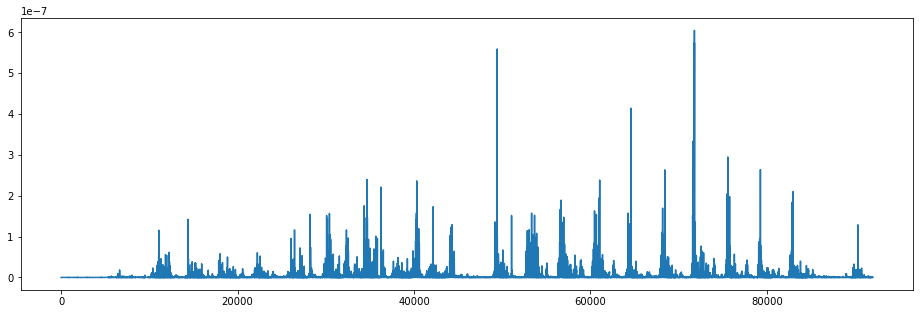

In [46]:
feature_df[features[0]].plot(figsize=(16,5))

<AxesSubplot:>

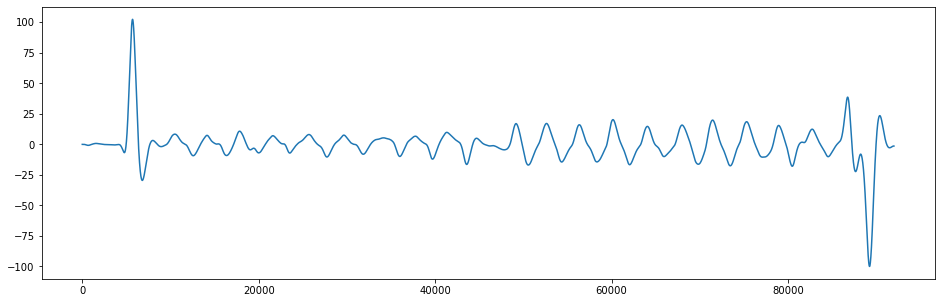

In [47]:
all_angle = feature_df['Pronation_Angle'].values
velocity = np.diff(list(all_angle)+[all_angle[-1]])
velocity = velocity/(1/2000)
b,a = signal.butter(3, 1,fs=2000)
velocity = signal.lfilter(b, a,velocity)
pd.Series(velocity).plot(figsize=(16,5))

In [48]:
features = feature_df.columns.to_list()
features

['EMG1__abs_energy',
 'EMG1__fft_coefficient__attr_"abs"__coeff_0',
 'EMG1__root_mean_square',
 'EMG6__count_above__t_0',
 'EMG6__count_below__t_0',
 'EMG6__benford_correlation',
 'EMG6__fft_coefficient__attr_"angle"__coeff_0',
 'EMG6__range_count__max_1000000000000__min_0',
 'Pronation_Angle',
 'Flexion_Angle',
 'Radial_Angle',
 'Elbow_Joint_Angle']

In [ ]:
system_shutdown()